# Df 0 0 5_Fill Any Object
This tutorial shows how to fill any object the class of which exposes a
`Fill` method.




**Author:** Danilo Piparo  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:00 AM.</small></i>

  A simple helper function to fill a test tree: this makes the example
 stand-alone.
 

In [1]:
%%cpp -d
void fill_tree(const char *treeName, const char *fileName)
{
   ROOT::RDataFrame d(100);
   auto i = 0.;
   d.Define("b1", [&i]() { return i; })
      .Define("b2",
              [&i]() {
                 float j = i * i;
                 ++i;
                 return j;
              })
      .Snapshot(treeName, fileName);
}

We prepare an input tree to run on

In [2]:
auto fileName = "df005_fillAnyObject.root";
auto treeName = "myTree";
fill_tree(treeName, fileName);

We read the tree from the file and create a rdataframe.

In [3]:
ROOT::RDataFrame d(treeName, fileName);

 ## Filling any object
 We now fill some objects which are instances of classes which expose a
 `Fill` method with some input arguments.

In [4]:
auto th1d = d.Fill<double>(TH1D("th1d", "th1d", 64, 0, 128), {"b1"});
auto th1i = d.Fill<float>(TH1I("th1i", "th1i", 64, 0, 128), {"b2"});
auto th2d = d.Fill<double, float>(TH2D("th2d", "th2d", 64, 0, 128, 64, 0, 1024), {"b1", "b2"});

auto c1 = new TCanvas();
th1d->DrawClone();

auto c2 = new TCanvas();
th1i->DrawClone();

auto c3 = new TCanvas();
th2d->DrawClone("COLZ");

return 0;

Draw all canvases 

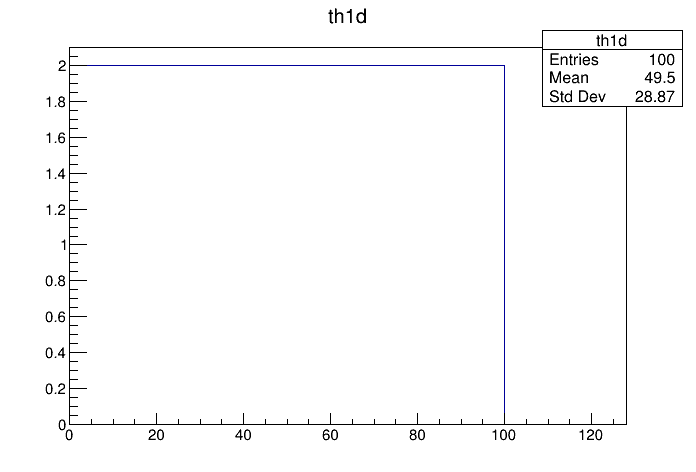

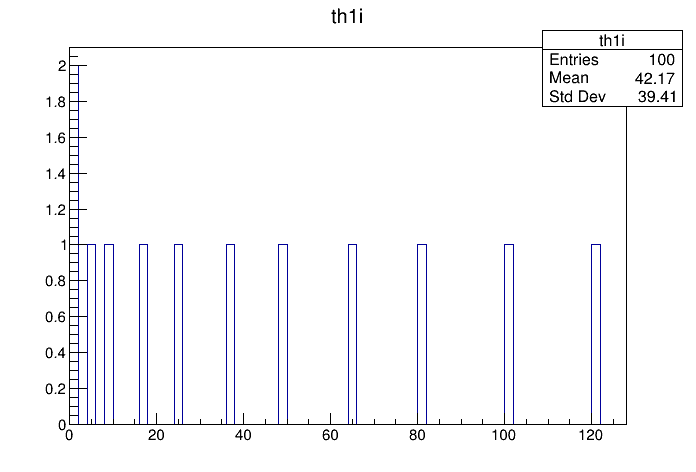

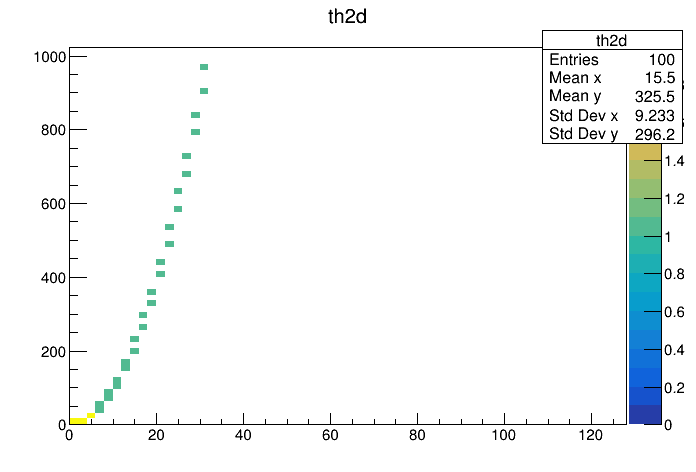

In [5]:
gROOT->GetListOfCanvases()->Draw()